![header](header.png)

# Procesamiento Digital de Señales en Sistemas Embebidos

---

# TP5: Procemamiento mediante ML *(parte 3)*

## Introducción

La técnica de la ventana deslizante es un método para iterar sobre una secuencia de datos, que generalmente se usa en el contexto del aprendizaje automático y el procesamiento de imágenes. Implica dividir los datos en ventanas superpuestas de un tamaño fijo y procesar cada ventana de forma independiente. De esta manera, reduce la complejidad del algoritmo utilizado.

Por ejemplo, considere una secuencia de puntos de datos que representan los valores de una serie de tiempo durante un período de tiempo. Una ventana deslizante de tamaño 3 implicaría dividir los datos en ventanas superpuestas de 3 puntos consecutivos y procesar cada ventana de forma independiente. La primera ventana constaría de los primeros 3 puntos, la segunda ventana constaría del segundo, tercero y cuarto puntos, y así sucesivamente.

La técnica de ventana deslizante se usa a menudo para extraer características de una secuencia de datos, como para la clasificación de imágenes o la detección de objetos. Puede ser útil en situaciones donde el contexto o la relación entre puntos de datos adyacentes es importante, ya que la superposición entre ventanas permite conservar el contexto.

![pan-tompkins](win.png)

La técnica de ventana deslizante se usa a menudo cuando necesita procesar una secuencia de datos, como una serie temporal, una imagen o una señal, y desea conservar el contexto o la relación entre puntos de datos adyacentes. Algunos escenarios comunes en los que se puede usar la técnica de la ventana deslizante incluyen:

1. Clasificación de imágenes: la técnica de ventana deslizante se puede utilizar para extraer características de una imagen dividiendo la imagen en ventanas superpuestas y procesando cada ventana de forma independiente. Esto le permite extraer características como bordes o texturas, mientras conserva la relación espacial entre las diferentes partes de la imagen.
2. Detección de objetos: la técnica de ventana deslizante se puede utilizar para escanear una imagen e identificar objetos mediante la búsqueda de patrones que coincidan con una plantilla de objeto predefinida. Esta puede ser una forma eficiente de buscar objetos en una imagen, ya que puede ajustar el tamaño y la superposición de la ventana deslizante para controlar el equilibrio entre la precisión y la eficiencia computacional.
3. Análisis de series temporales: la técnica de la ventana deslizante se puede utilizar para analizar una serie temporal dividiendo los datos en ventanas superpuestas y procesando cada ventana de forma independiente. Esto puede resultar útil para tareas como la previsión o "forecasting", en las que desea tener en cuenta la relación entre puntos de datos adyacentes.
4. Procesamiento de señales: la técnica de ventana deslizante se puede utilizar para analizar una señal, como una señal de audio o video, dividiendo la señal en ventanas superpuestas y procesando cada ventana de forma independiente. Esto puede resultar útil para tareas como la extracción de características o la reducción de ruido, en las que desea conservar la relación entre puntos de datos adyacentes.

Fuente:
https://eloquentarduino.github.io/2021/06/covid-patient-health-assessing-device-using-sliding-window/

In [2]:
# Incluir librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import recall_score
from micromlgen import port
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import process_code
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import seaborn as sns
# Set seed for experiment reproducibility
seed = 3
np.random.seed(seed)
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
"""
Generate syntethic data
"""
# Number of sample datapoints
SAMPLES = 250

# Generate a uniformly distributed set of random numbers in the range from
minutes = np.random.uniform(low=0, high=1500, size=SAMPLES).astype(np.uint32)

# Stable Condition
# SpO2 Range = 96 to 100
#Respiratory Rate = 12 to 20
#Pulse = 51 to 90
#Body Temperature = 96 to 100

StableSpO2=np.random.uniform(low=96, high=100, size=SAMPLES).astype(np.uint8)
StableRR=np.random.uniform(low=18, high=20, size=SAMPLES).astype(np.uint8)
StablePulse=np.random.uniform(low=51, high=90, size=SAMPLES).astype(np.uint8)
StableTemp=np.random.uniform(low=96, high=100, size=SAMPLES).astype(np.float32)

# Mild Condition
# SpO2 Range = 93 to 95
#Respiratory Rate = 21 to 24
#Pulse = 41 to 50
#Body Temperature = 100 to 102

MildSpO2=np.random.uniform(low=93, high=95, size=SAMPLES).astype(np.uint8)
MildRR=np.random.uniform(low=21, high=24, size=SAMPLES).astype(np.uint8)
MildPulse=np.random.uniform(low=48, high=50, size=SAMPLES).astype(np.uint8)
MildTemp=np.random.uniform(low=100, high=102, size=SAMPLES).astype(np.float32)


# Moderate Condition
# SpO2 Range = 90 to 92
#Respiratory Rate = 25 to 30
#Pulse = 41 to 50
#Body Temperature = 102 to 106


ModerateSpO2=np.random.uniform(low=90, high=92, size=SAMPLES).astype(np.uint8)
ModerateRR=np.random.uniform(low=25, high=30, size=SAMPLES).astype(np.uint8)
ModeratePulse=np.random.uniform(low=41, high=50, size=SAMPLES).astype(np.uint8)
ModerateTemp=np.random.uniform(low=102, high=106, size=SAMPLES).astype(np.float32)


# Critical Condition
# SpO2 Range = 80 to 90
#Respiratory Rate = 30 to 40
#Pulse = 30 to 40
#Body Temperature = 102 to 106


CriticalSpO2=np.random.uniform(low=85, high=90, size=SAMPLES).astype(np.uint8)
CriticalRR=np.random.uniform(low=38, high=40, size=SAMPLES).astype(np.uint8)
CriticalPulse=np.random.uniform(low=38, high=40, size=SAMPLES).astype(np.uint8)
CriticalTemp=np.random.uniform(low=102, high=106, size=SAMPLES).astype(np.float32)


In [4]:
"""
Format as pd.DataFrame
"""

stable = pd.DataFrame(list(zip(StableSpO2, StableRR, StablePulse, StableTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])
mild = pd.DataFrame(list(zip(MildSpO2, MildRR, MildPulse, MildTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])
moderate = pd.DataFrame(list(zip(ModerateSpO2, ModerateRR, ModeratePulse, ModerateTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])
critical = pd.DataFrame(list(zip(CriticalSpO2, CriticalRR, CriticalPulse, CriticalTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])

In [5]:
"""
Format pd.DataFrames as numpy matrices for pre-processing/training
"""
X = np.vstack((mild.to_numpy()))
senial_int = X.astype(np.int8)

<Axes: title={'center': 'Mild'}>

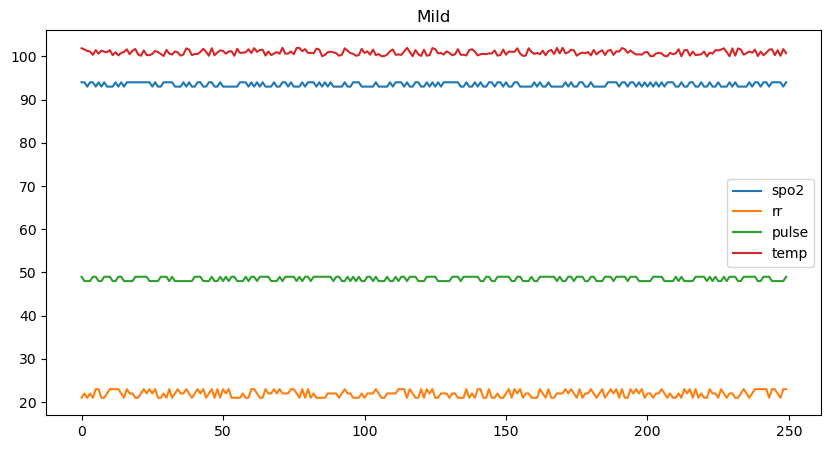

In [6]:
mild.plot(title='Mild')

In [30]:
try:
    import serial
except:
    !pip install pyserial
    import serial

## Envío de datos por UART

El siguiente bloque de código permite enviar los valores de la señal a través de la UART al ESP32, de a uno en uno a una tasa de `ts` segundos.

También permite visualizar la salida por terminal generada por el ESP32 (simulando el monitor).

Para probarlo, cargar el ejemplo de C `uart_ML_win` en el ESP y luego ejecutar las celdas siguientes (configurando previamente el nombre del puerto).

> Nota: 
>
> Para manejar puerto serie desde python: [pySerial](https://pyserial.readthedocs.io/en/latest/pyserial.html)
> 
> Para ejecutar múltiples tareas al mismo tiempo: [threading](https://docs.python.org/es/3.8/library/threading.html)

In [31]:
import threading
import time
import struct
from ipywidgets import IntProgress, Output, Button
from IPython.display import display
fs = 50
ts = 1/fs
puerto = "COM4"
N_muestras = 5 * fs # 10 segundos de señal
#N_muestras = N      # señal completa

# Configurar puerto serie
ser = serial.Serial(puerto,
                    921600,
                    timeout=5,
                    write_timeout=5,
                    bytesize=serial.EIGHTBITS,
                    parity=serial.PARITY_NONE,
                    stopbits=serial.STOPBITS_ONE,
                    rtscts=True)

recibiendo = True
enviando = True
    
# Barra de avance
bar = IntProgress(min=0, max=N_muestras) 
# Monitor
out = Output(layout={'border': '1px solid black',
                     'height': '400px',
                     'overflow': 'hidden scroll'})

# Tarea de envío de datos
def send_data(target, count): 
    t_start = time.time()
    global recibiendo, enviando
    a = senial_int[count][0]
    b = senial_int[count][1]
    c = senial_int[count][2]
    d = senial_int[count][3]
    sig_bytes = struct.pack('BBBB', a, b, c, d)  # Extraer los bytes de cada dato
    try:
        ser.write(sig_bytes)                         # Escribir datos en el puerto serie
    except:
        print("Error al escribir en el puerto")
        enviando = False
    bar.value += 1 
    count += 1
    if count < N_muestras and enviando:
        # Volver a ejecutar la función ts segundos después
        t = time.time() - t_start
        threading.Timer(target-time.time()-t, send_data, [target+ts, count]).start() 
    else:
        recibiendo = False
        print("Envío de señal finalizado.")

# Tarea de recepción de datos
def receive_data():
    global recibiendo
    
    # Mostrar widgets
    print(f"Duración de la señal {(N_muestras*ts):.0f} segundos")
    print("Enviando señal:")
    display(bar) 
    display(out)
    
    # Reset ESP32
    ser.dtr = False
    time.sleep(0.2)
    ser.dtr = True
    ser.rtscts = False
    
    #Iniciar envío de datos
    target = time.time() + ts
    send_data(target, count=0)
    
    while(recibiendo):
        line = ser.read_until()
        if(line != b''):
            try:
                line = line.decode("utf-8").strip('\n')
            except:
                line = ''
            with out:
                print(line)

# Iniciar recepción
receive_thread = threading.Thread(name='receive_data', target=receive_data)
receive_thread.start()

receive_thread.join()
# Cerrar el puerto
ser.close()

Duración de la señal 5 segundos
Enviando señal:


IntProgress(value=0, max=250)

Output(layout=Layout(border='1px solid black', height='400px', overflow='hidden scroll'))

Envío de señal finalizado.
